In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class KMeans:
    # Initialize the KMeans clustering algorithm with specified parameters
    def __init__(self, n_clusters=3, max_iter=300, tol=0.0001):
        self.n_clusters = n_clusters  # Number of clusters to form
        self.max_iter = max_iter      # Maximum number of iterations for convergence
        self.tol = tol                # Tolerance for centroid movement to declare convergence
        self.centroids = {}           # Dictionary to store centroids

    # Fit the KMeans model to the data
    def fit(self, data):
        # Randomly select initial centroids from the data
        self.centroids = {i: data[np.random.randint(0, len(data))] for i in range(self.n_clusters)}

        for i in range(self.max_iter):
            self.classifications = {j: [] for j in range(self.n_clusters)}  # Dict to store point classifications

            # Assign each data point to the nearest centroid
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            # Recalculate the centroids based on current classifications
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True  # Flag to check if convergence is achieved

            # Check if any centroid has moved more than the tolerance; if so, not yet optimized
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.linalg.norm(current_centroid - original_centroid) > self.tol:
                    optimized = False
                    break

            if optimized:
                break  # Break the loop if optimized (convergence achieved)

    # Predict the cluster for a new data point
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        return distances.index(min(distances))  # Return the closest centroid's cluster

    # Calculate the Within-Cluster Sum of Squares (WCSS)
    def wcss(self):
        sum_of_squares = 0
        for classification in self.classifications:
            centroid = self.centroids[classification]
            # Sum squared distances of points to their centroid
            sum_of_squares += sum([np.linalg.norm(featureset - centroid)**2 for featureset in self.classifications[classification]])
        return sum_of_squares

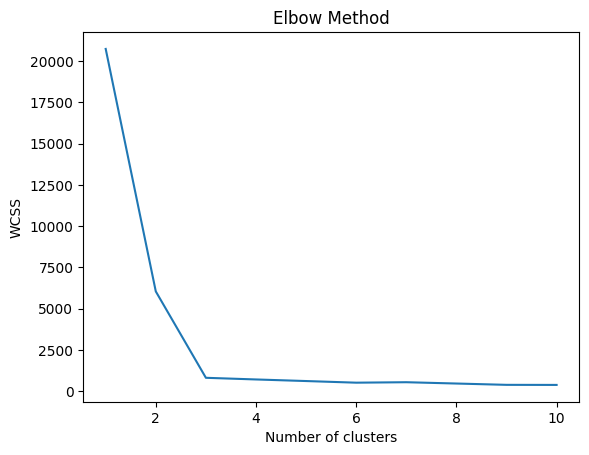

In [19]:
# Generating synthetic data for demonstration
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, n_features=2, random_state=42)

# Applying the elbow method to find the optimal number of clusters
wcss_values = []
for k in range(1, 11):  # Testing k values from 1 to 10
    kmeans = KMeans(n_clusters=k, max_iter=300)
    kmeans.fit(data)
    wcss_values.append(kmeans.wcss())  # Calculate and store the WCSS for each k

# Plot the WCSS values to visualize the elbow
plt.plot(range(1, 11), wcss_values)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()  # Display the elbow plot

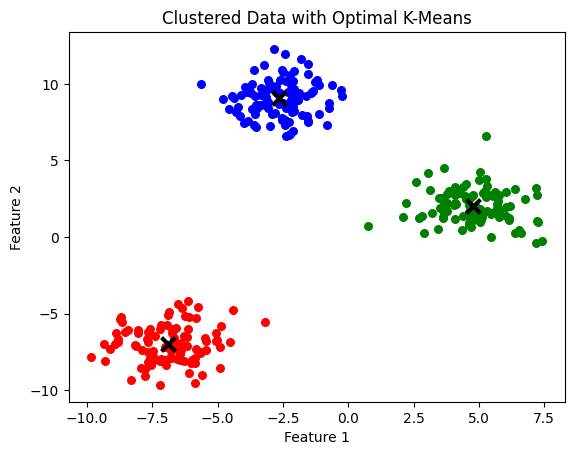

In [16]:
# Assuming the optimal number of clusters is found to be 3 from the elbow method
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, max_iter=300)
kmeans_optimal.fit(data)

# Plotting the clusters and their centroids
colors = ['r', 'g', 'b']
for classification in kmeans_optimal.classifications:
    color = colors[classification]
    for featureset in kmeans_optimal.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], color=color, s=30)

# Plotting the centroids
for centroid in kmeans_optimal.centroids:
    plt.scatter(*kmeans_optimal.centroids[centroid], color='k', marker='x', s=100, linewidths=3)

plt.title('Clustered Data with Optimal K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()